In [1]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA

In [2]:
#Read train and test data
data_train = pd.read_csv("train (1).csv")
data_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
data_train.shape

(69999, 172)

In [4]:
data_test = pd.read_csv("test (1).csv")
data_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
data_test.shape

(30000, 171)

In [6]:
data_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69999 non-null  object
 1   last_date_of_month_7      69600 non-null  object
 2   last_date_of_month_8      69266 non-null  object
 3   date_of_last_rech_6       68898 non-null  object
 4   date_of_last_rech_7       68765 non-null  object
 5   date_of_last_rech_8       67538 non-null  object
 6   date_of_last_rech_data_6  17568 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18417 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [7]:
data_train.select_dtypes(include=['number']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [8]:
data_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
#EDA process

#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [10]:
#Checking data in columns having null values
for i in data_train.columns:
    print(i,data_train[i].unique())

id [    0     1     2 ... 69996 69997 69998]
circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
arpu_6 [ 31.277   0.     60.806 ... 372.088 238.575 168.269]
arpu_7 [ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
arpu_8 [  7.527  42.953   0.    ... 279.782 145.062 167.961]
onnet_mou_6 [ 48.58   0.     0.53 ... 486.49 399.01 116.54]
onnet_mou_7 [124.38   0.    15.93 ... 453.83 378.21 283.63]
onnet_mou_8 [  1.29   0.     6.13 ... 458.79 380.99 232.63]
offnet_mou_6 [ 32.24   0.    53.99 ... 617.98 360.88 575.46]
offnet_mou_7 [ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
offnet_mou_8 [  2.33  30.89   0.   ...  79.16 783.66 263.84]
roam_ic_mou_6 [  0.    53.64  28.26 ... 221.03  48.39 377.24]
roam_ic_mou_7 [  0.    11.31   7.23 ...  64.53 189.64  37.41]
roam_ic_mou_8 [  0.    47.81   3.46 ... 199.44  51.84 506.26]
roam_og_mou_6 [  0.

isd_ic_mou_8 [  0.   402.38   1.1  ... 947.44  67.71  35.79]
ic_others_6 [ 1.11  0.    0.18 ... 56.19 42.01 17.46]
ic_others_7 [6.9000e-01 0.0000e+00 1.9000e-01 ... 1.5090e+01 1.0350e+01 6.1349e+02]
ic_others_8 [  0.     0.25   0.24 ...  26.43   7.3  230.34]
total_rech_num_6 [  3   2  13   9   4   8  10  15   6   7   5  12  26   1   0  23  11  24
  16  20  43  14  28  18  17  22  33  25  19  42  46  52  39  37  44  21
  47  31  32  35  38  30  53  27  56  29  65  45  34  63  64  36  50  70
  40  48  51  41  61  59  76  49  90  72  77 121  71  83  73  66  88 170
  55  94  62 116  58  84 125  68  54  60  67  89  69  57  87  80  74 102
 105 117  75  78]
total_rech_num_7 [  2   4  10   8   3   6   5  19   7   0  21  14  17  29   9  50  11  13
  33   1  18  12  24  15  41  44  23  16  22  26  28  38  39  20  30  27
  66  32  25  31  37  43  51  47  36  35  49  60  34  58  46  40  48  42
  45  64  54  77  69  72 111  57  70  75  63  59  87  68  61  53  67  55
  84  73  82  74  83 138  62  96

sachet_3g_7 [ 0  1  4  2  7  5  6  3  9 15 11  8 12 13 24 18 10 17 20 14 33 22 31 19
 16 21]
sachet_3g_8 [ 0  1  6  5  2  8  3  7  4 41  9 10 11 16 29 15 13 18 12 20 23 19 14 21
 17 30 25 38]
fb_user_6 [nan  1.  0.]
fb_user_7 [nan  1.  0.]
fb_user_8 [nan  1.  0.]
aon [1958  710  882 ... 3330 3491 2913]
aug_vbc_3g [  0.    82.26   1.05 ... 107.77  72.25 664.25]
jul_vbc_3g [0.00000e+00 7.35600e+01 8.60000e-01 ... 1.12700e+02 1.65300e+01
 1.40296e+03]
jun_vbc_3g [  0.   177.14  18.95 ... 148.8   18.84 990.97]
churn_probability [0 1]


In [11]:
data_train.max()

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

In [12]:
print(data_train.id.duplicated().sum()) #checking if any duplicate rows based on id column

0


In [13]:
#Dropping columns which has all values 0
drop_0_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                  'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_train.drop(drop_0_columns,axis=1,inplace = True)
data_test.drop(drop_0_columns,axis=1,inplace = True)

In [15]:
#fill 0 to nan value
fill_0_columns = data_train.select_dtypes(include=['number']).columns
data_train[fill_0_columns] = data_train[fill_0_columns].fillna(0)

In [16]:
fill_0_columns = data_test.select_dtypes(include=['number']).columns

data_test[fill_0_columns] = data_test[fill_0_columns].fillna(0)

In [17]:
for i in data_train.select_dtypes(include=['object']).columns:
    print(i,data_train[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2

In [18]:
data_train['last_date_of_month_7'] = data_train['last_date_of_month_7'].fillna('7/31/2014')
data_train['last_date_of_month_8'] = data_train['last_date_of_month_8'].fillna('8/31/2014')
data_train['date_of_last_rech_6'] = data_train['date_of_last_rech_6'].fillna('6/30/2014')
data_train['date_of_last_rech_7'] = data_train['date_of_last_rech_7'].fillna('7/31/2014')
data_train['date_of_last_rech_8'] = data_train['date_of_last_rech_8'].fillna('8/31/2014')
data_train['date_of_last_rech_data_6'] = data_train['date_of_last_rech_data_6'].fillna('6/30/2014')
data_train['date_of_last_rech_data_7'] = data_train['date_of_last_rech_data_7'].fillna('7/31/2014')
data_train['date_of_last_rech_data_8'] = data_train['date_of_last_rech_data_8'].fillna('8/31/2014')

data_test['last_date_of_month_7'] = data_test['last_date_of_month_7'].fillna('7/31/2014')
data_test['last_date_of_month_8'] = data_test['last_date_of_month_8'].fillna('8/31/2014')
data_test['date_of_last_rech_6'] = data_test['date_of_last_rech_6'].fillna('6/30/2014')
data_test['date_of_last_rech_7'] = data_test['date_of_last_rech_7'].fillna('7/31/2014')
data_test['date_of_last_rech_8'] = data_test['date_of_last_rech_8'].fillna('8/31/2014')
data_test['date_of_last_rech_data_6'] = data_test['date_of_last_rech_data_6'].fillna('6/30/2014')
data_test['date_of_last_rech_data_7'] = data_test['date_of_last_rech_data_7'].fillna('7/31/2014')
data_test['date_of_last_rech_data_8'] = data_test['date_of_last_rech_data_8'].fillna('8/31/2014')

In [19]:
#dropping 2 columns since thier data is not significant and all are unique values
data_train.drop(['circle_id'],axis=1,inplace=True)

data_test.drop(['circle_id'],axis=1,inplace=True)

In [20]:
data_train.shape

(69999, 161)

In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 161 entries, last_date_of_month_6 to churn_probability
dtypes: float64(126), int64(26), object(9)
memory usage: 86.0+ MB


0    89.81
1    10.19
Name: churn_probability, dtype: float64


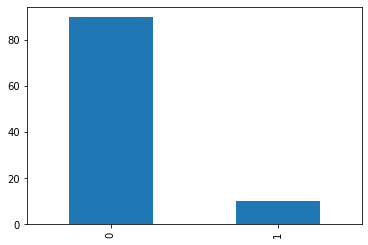

In [22]:
##Univariate Variables Starts

# target column is churn_probability we will start analysis
print(round(data_train.churn_probability.value_counts()*100/len(data_train),2))
round(data_train.churn_probability.value_counts()*100/len(data_train),2).plot.bar()
plt.show()
#Observation :
#89% is 0 churn probability
#10* is 1 churn probability

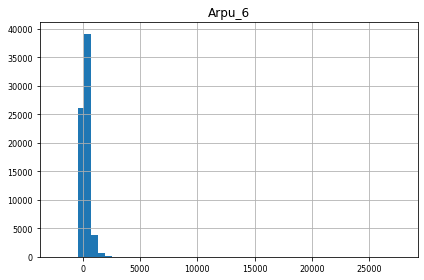

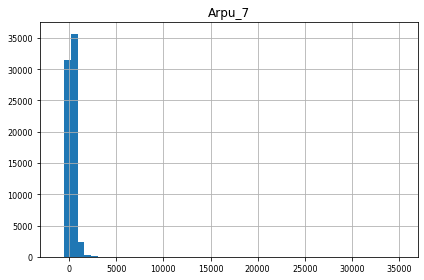

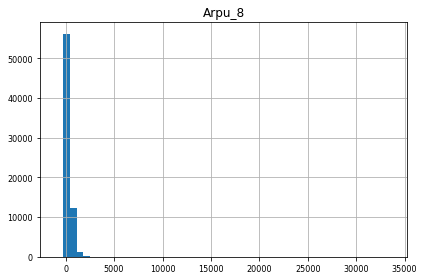

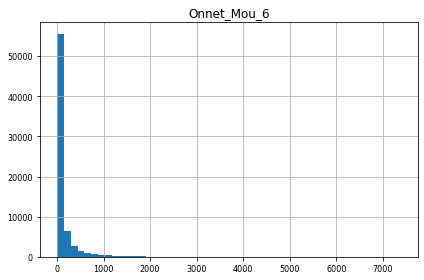

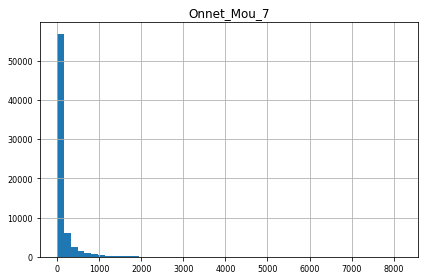

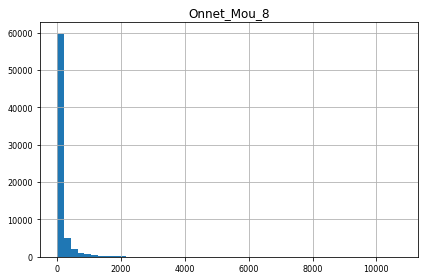

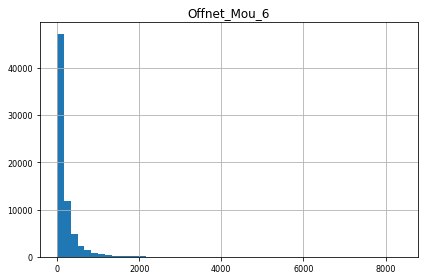

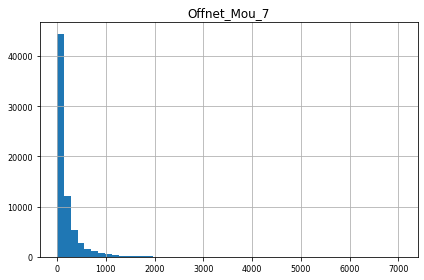

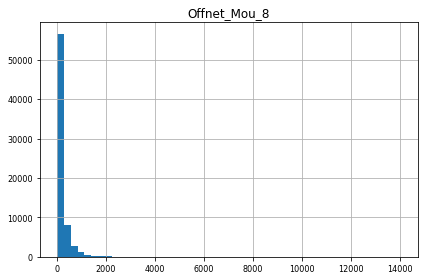

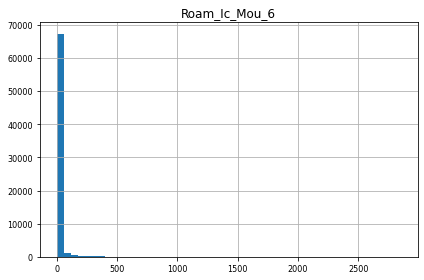

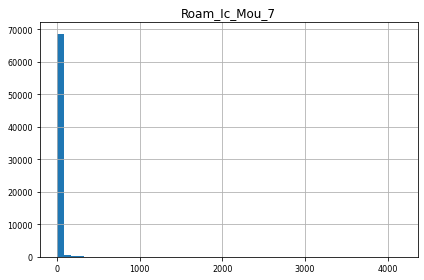

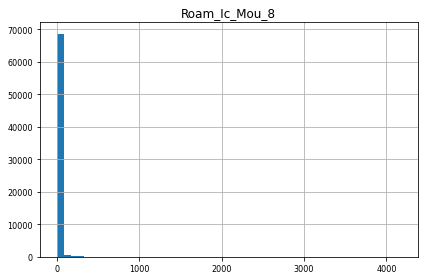

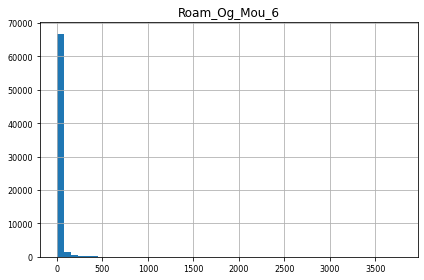

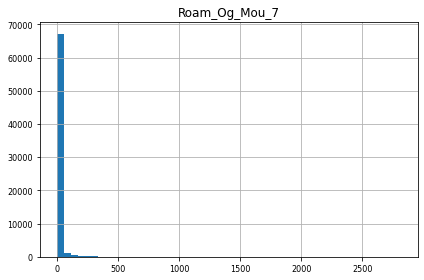

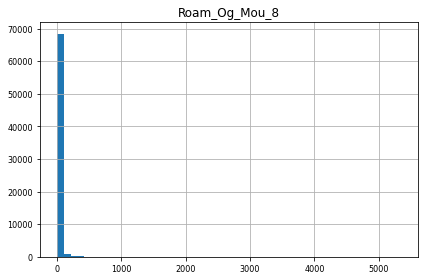

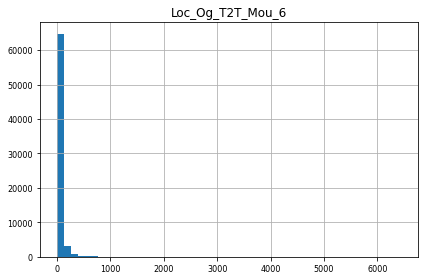

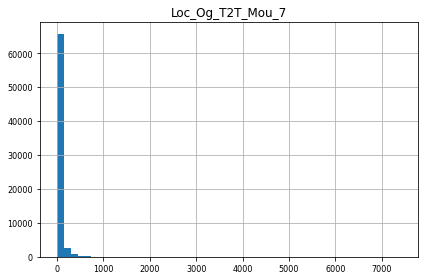

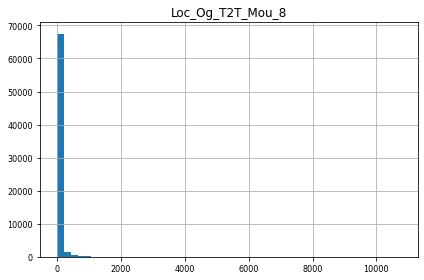

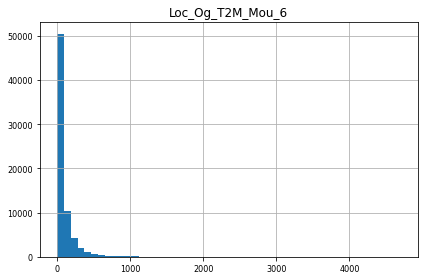

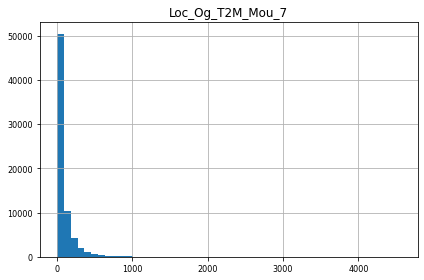

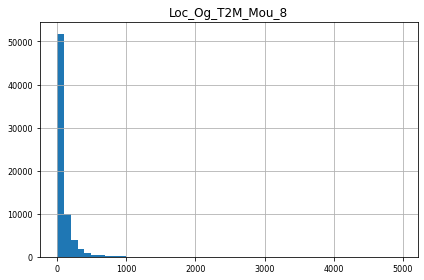

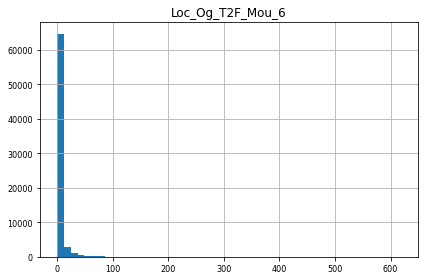

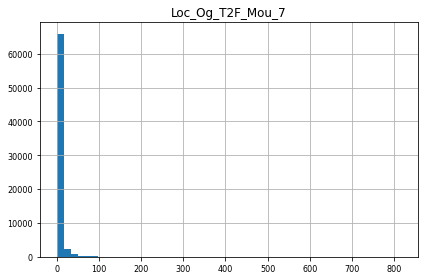

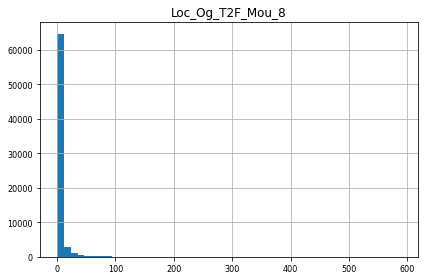

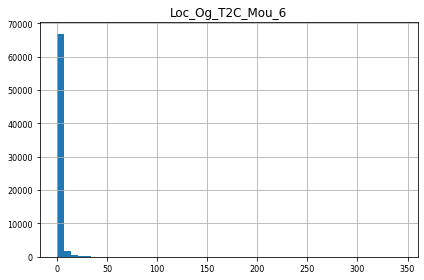

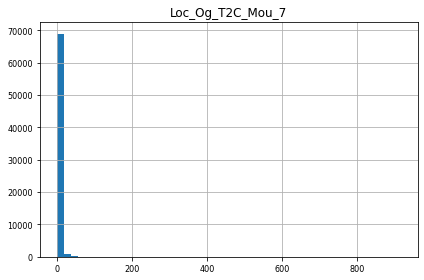

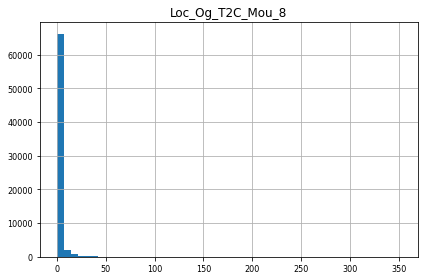

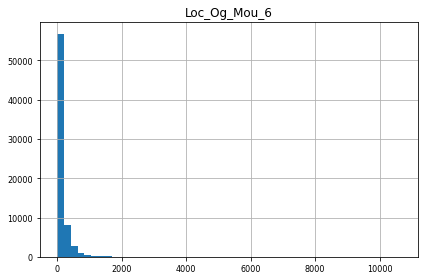

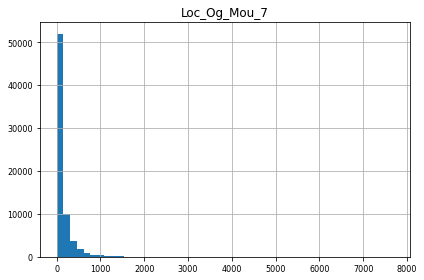

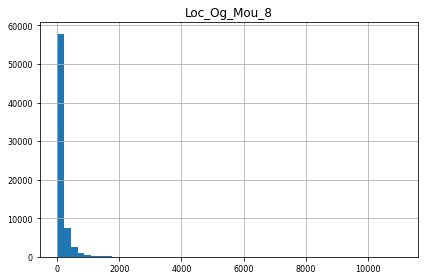

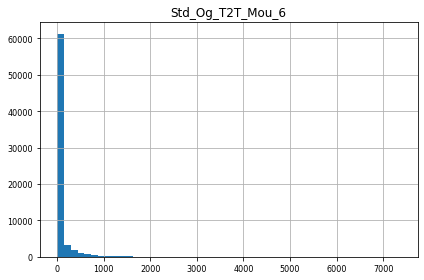

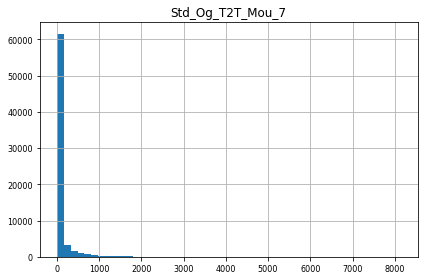

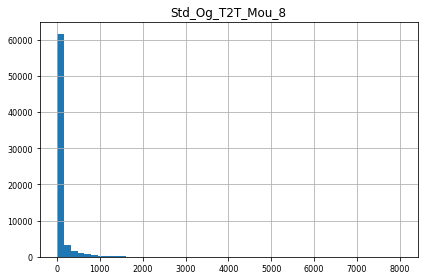

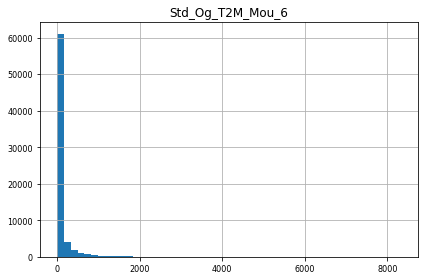

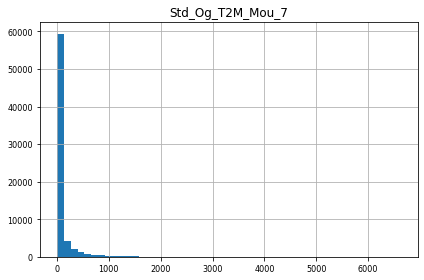

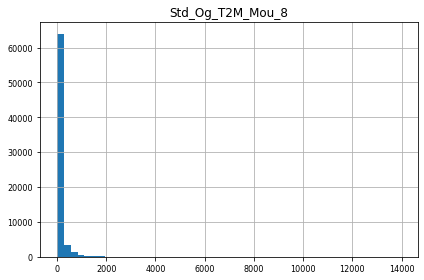

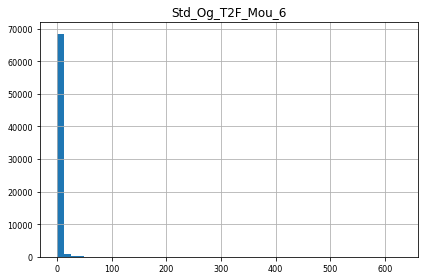

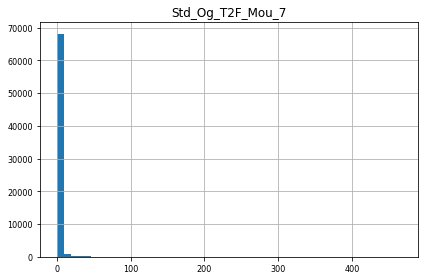

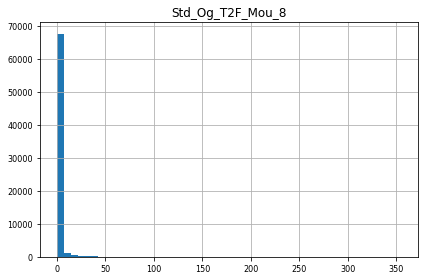

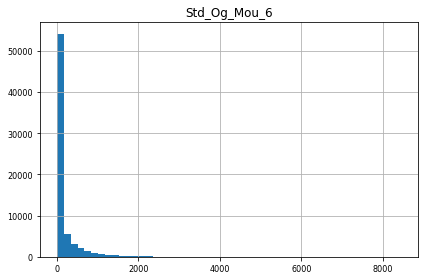

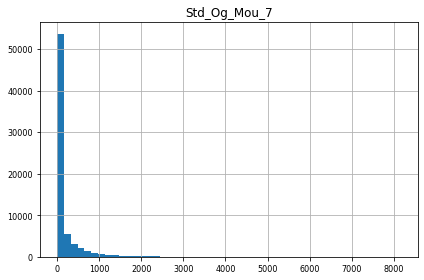

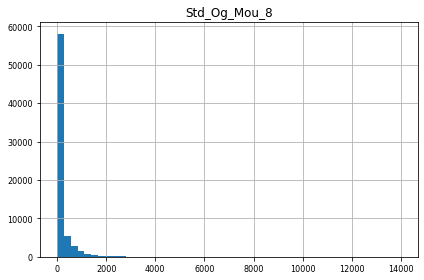

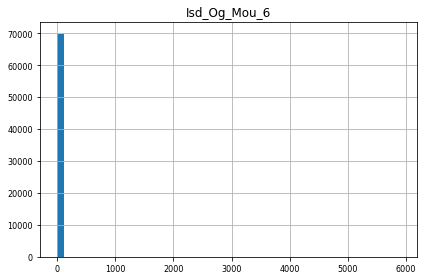

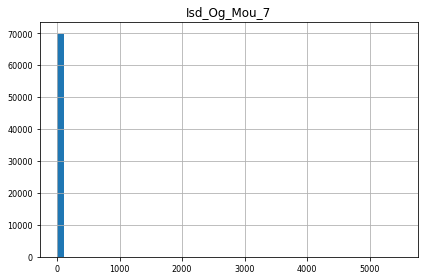

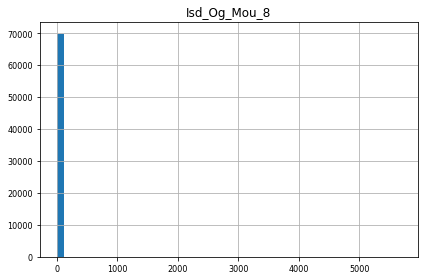

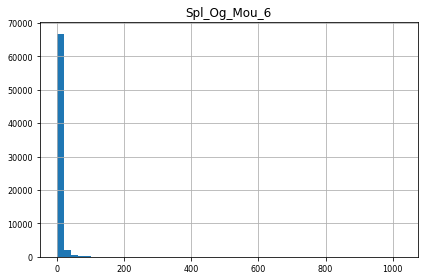

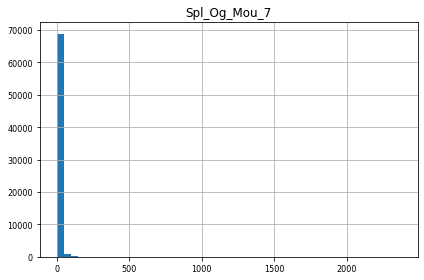

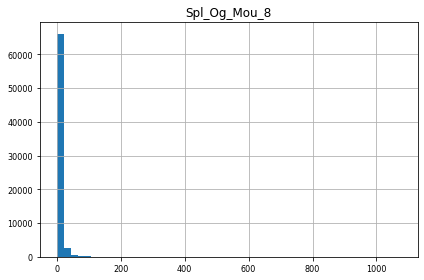

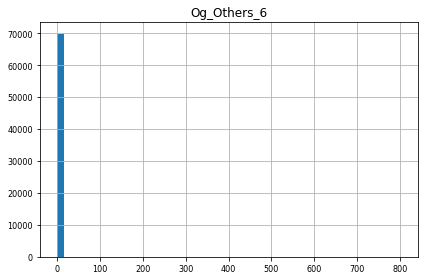

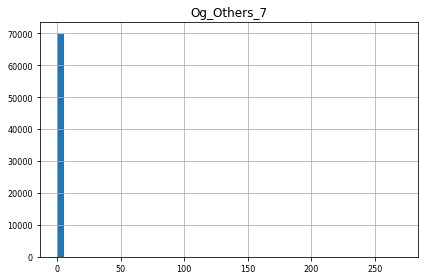

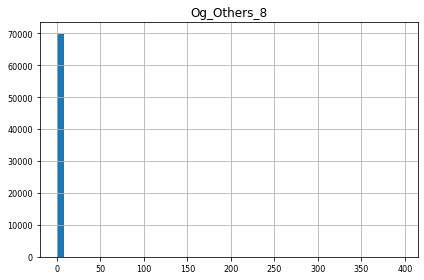

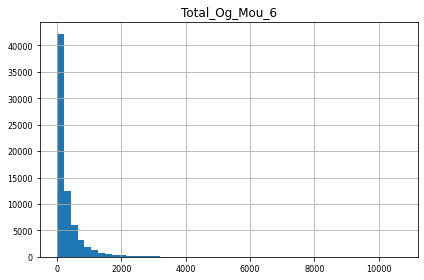

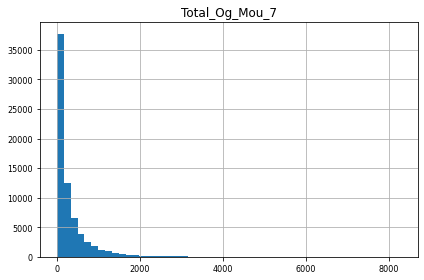

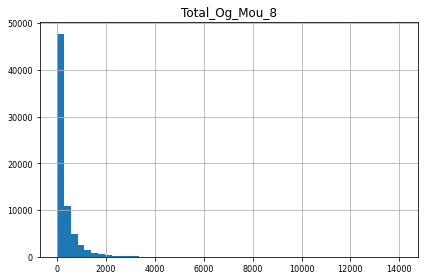

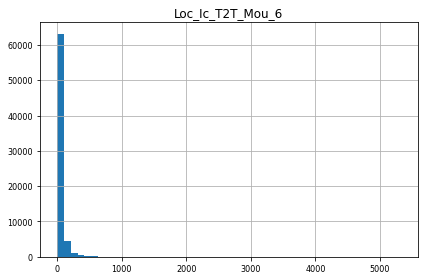

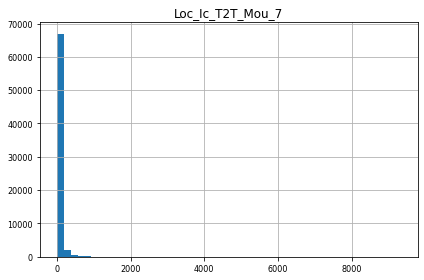

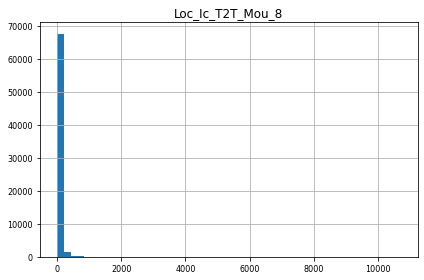

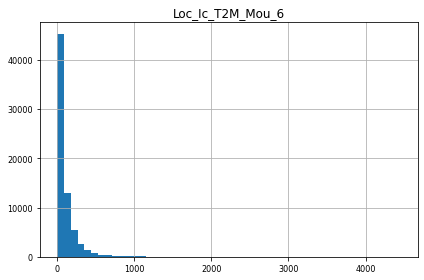

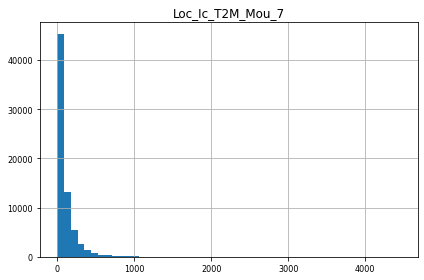

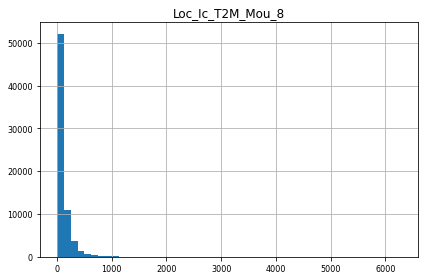

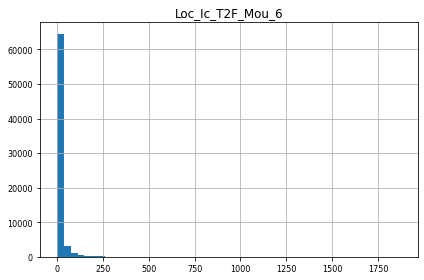

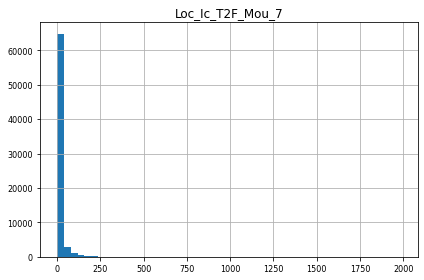

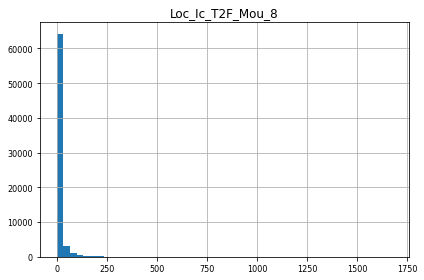

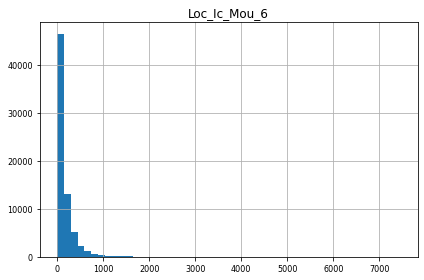

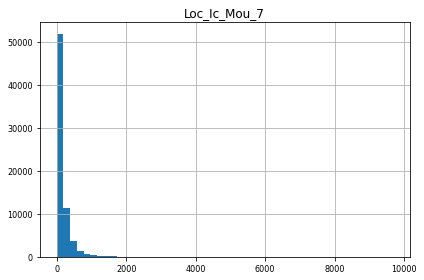

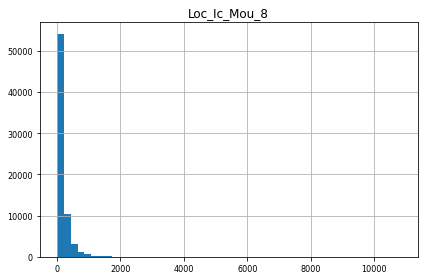

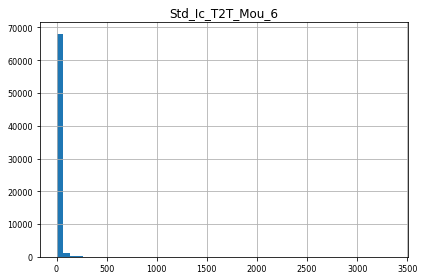

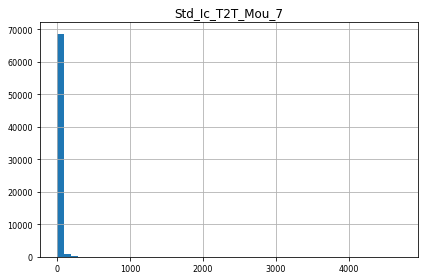

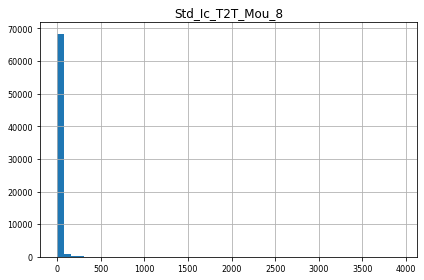

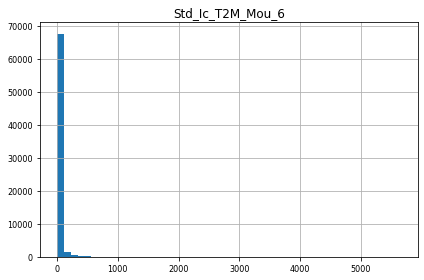

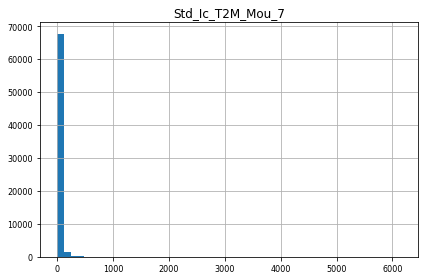

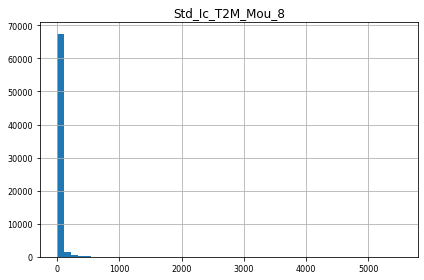

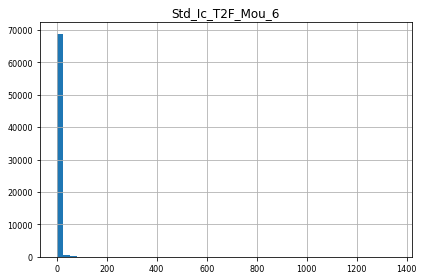

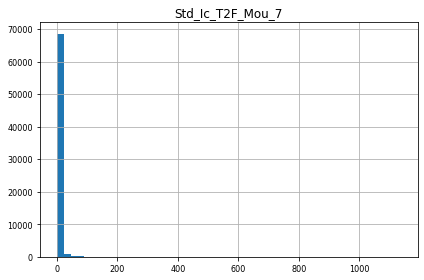

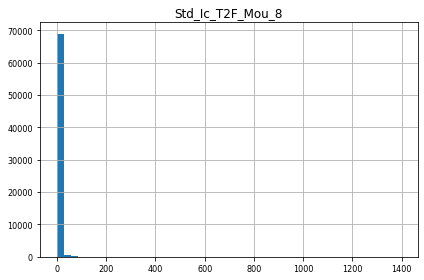

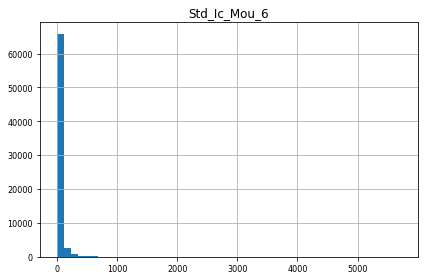

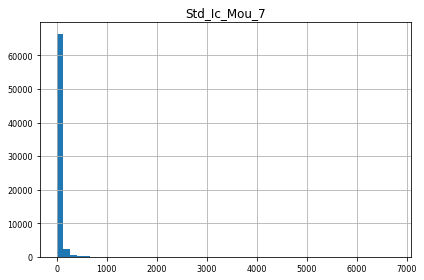

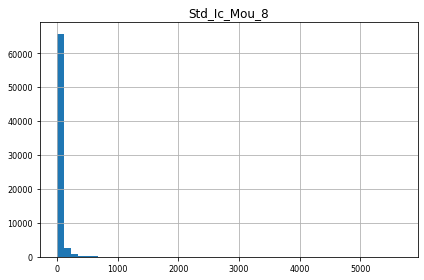

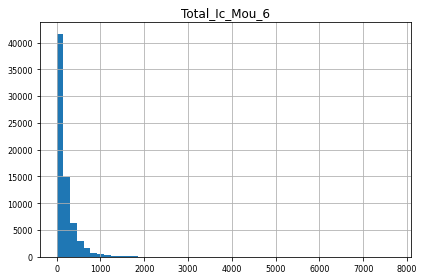

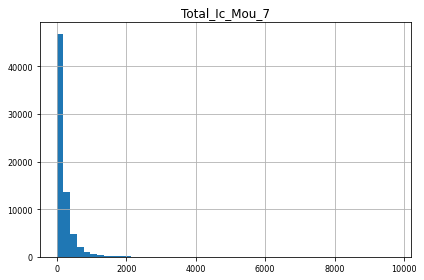

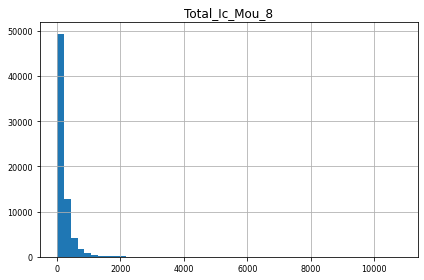

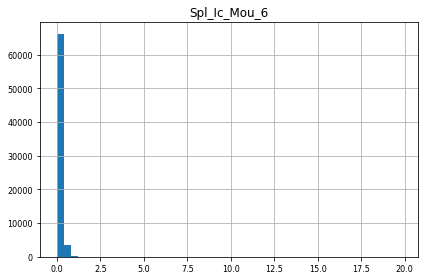

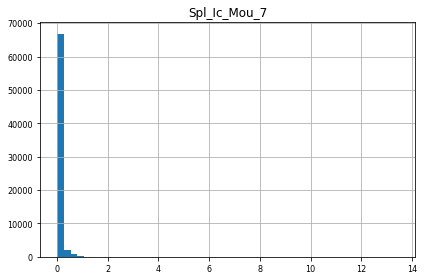

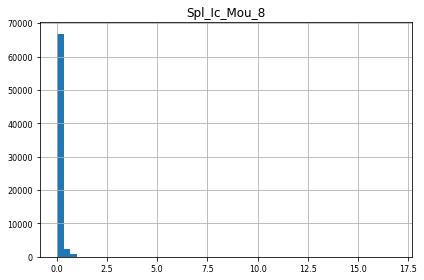

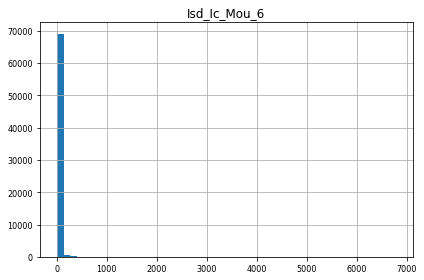

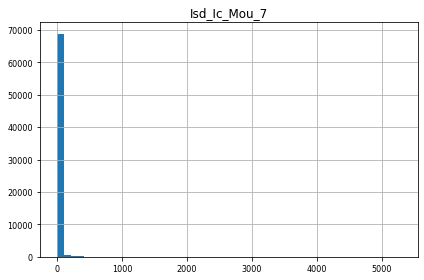

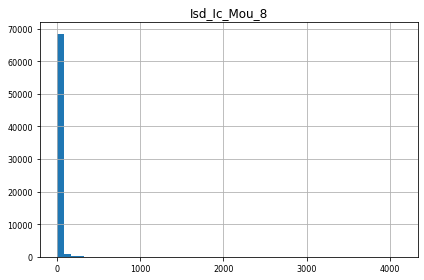

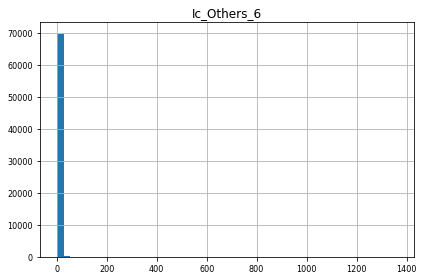

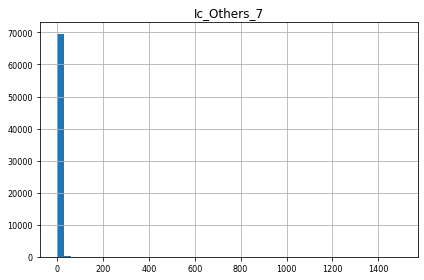

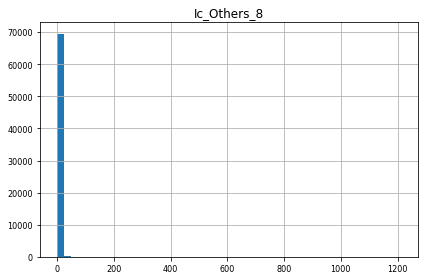

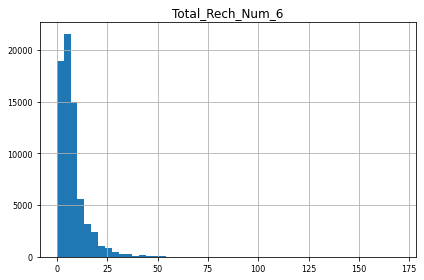

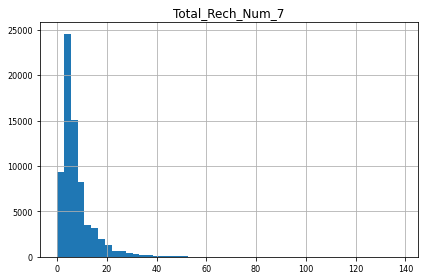

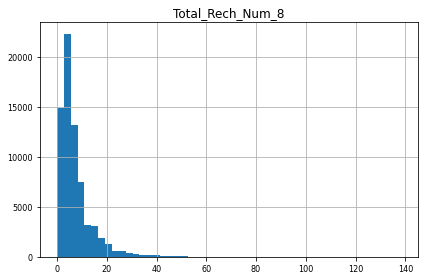

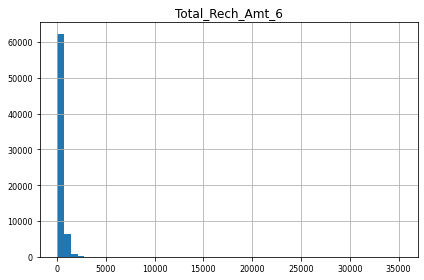

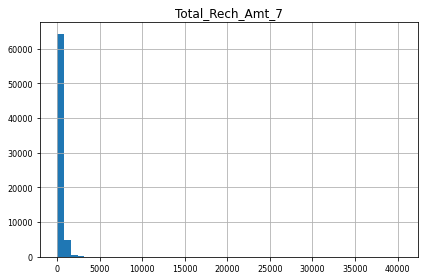

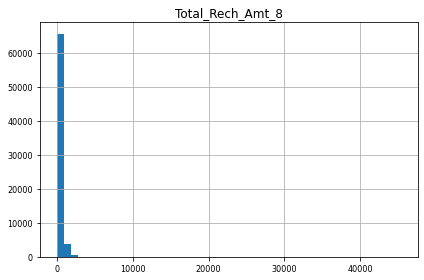

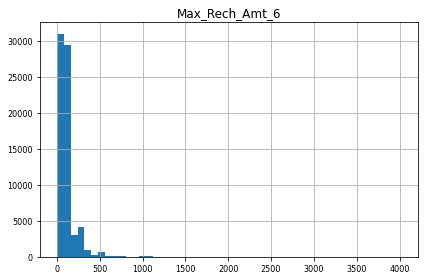

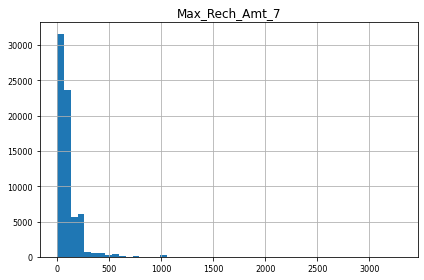

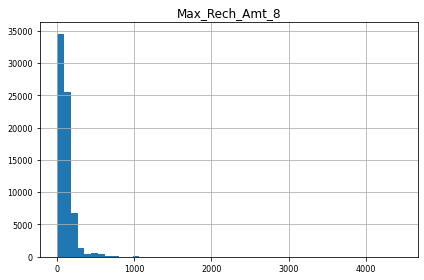

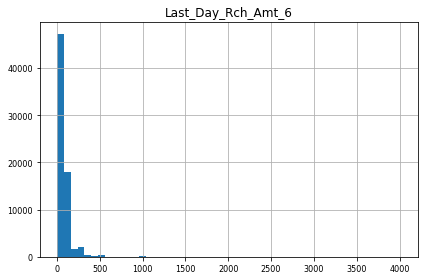

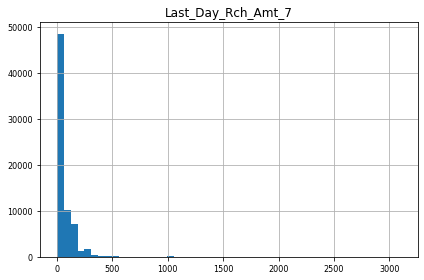

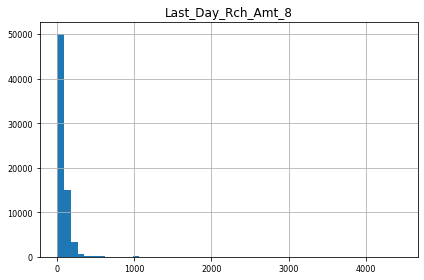

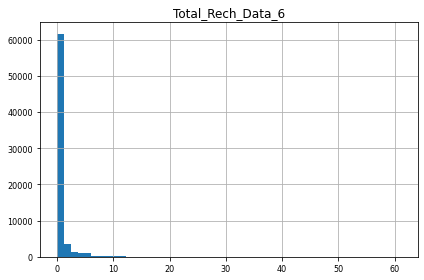

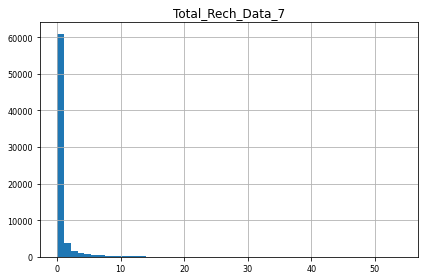

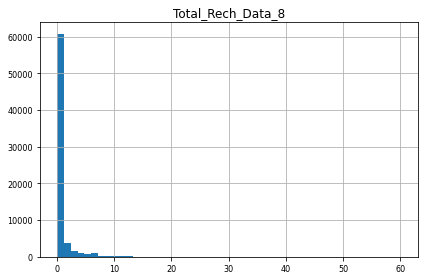

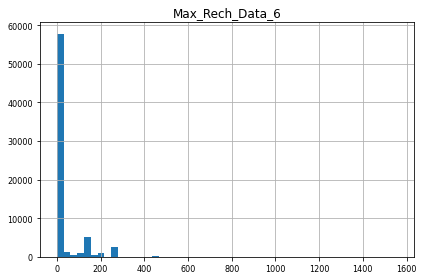

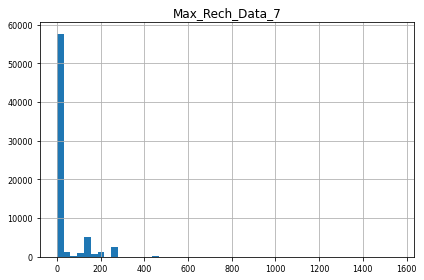

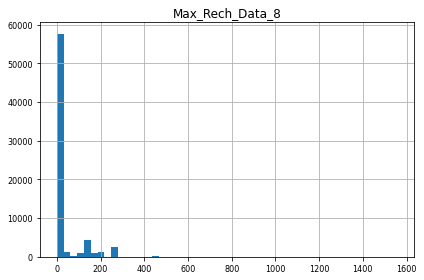

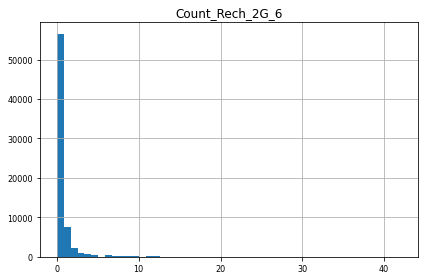

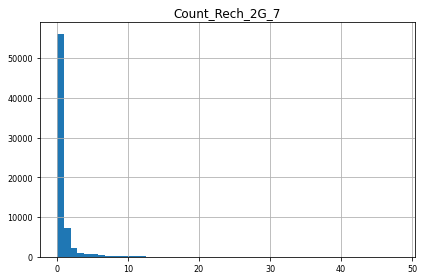

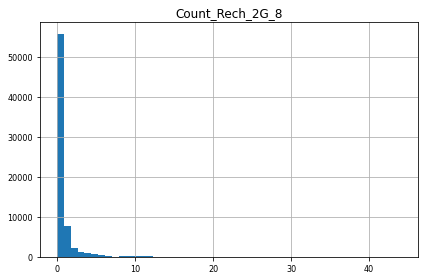

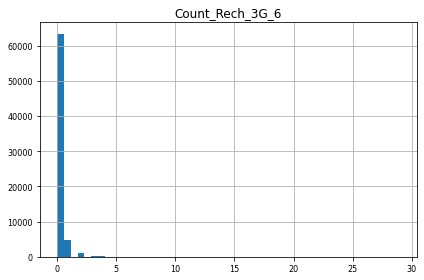

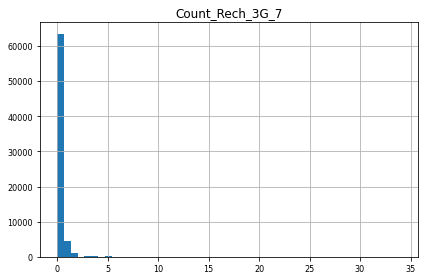

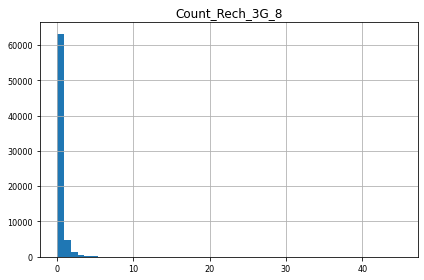

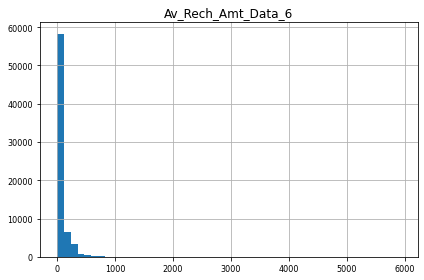

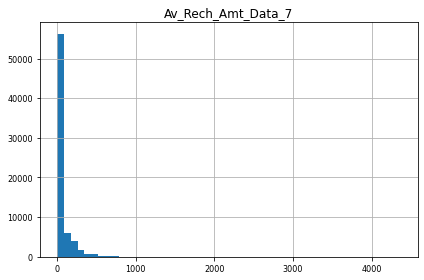

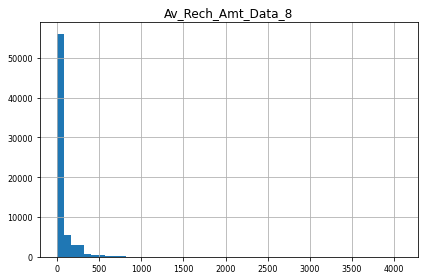

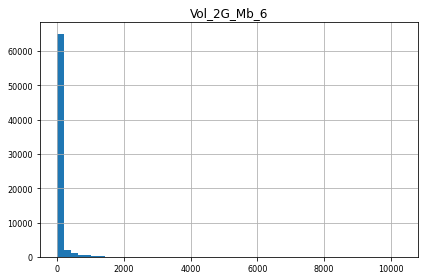

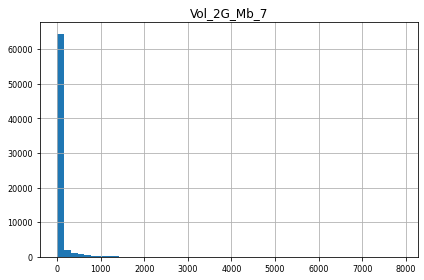

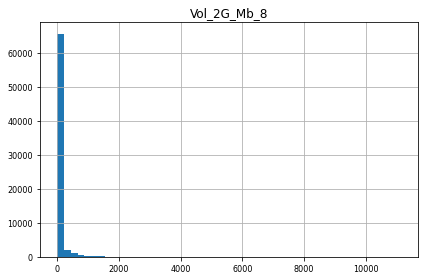

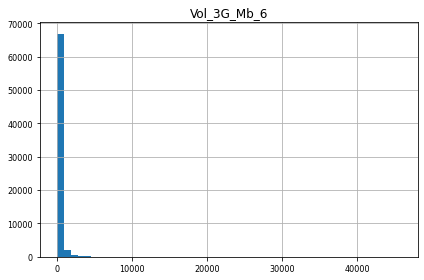

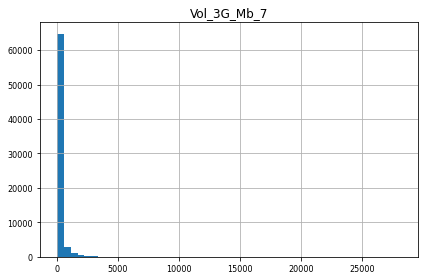

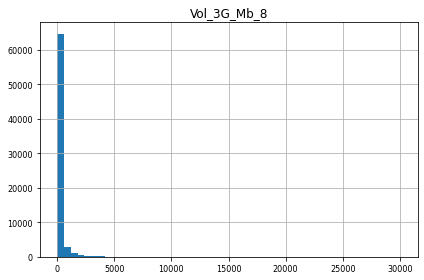

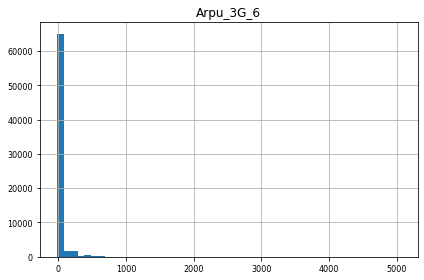

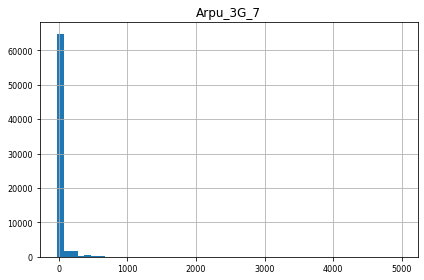

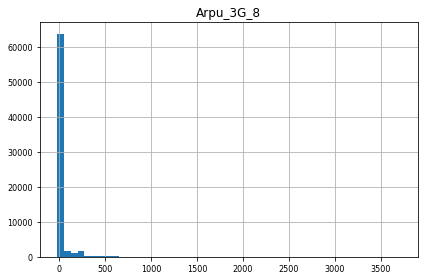

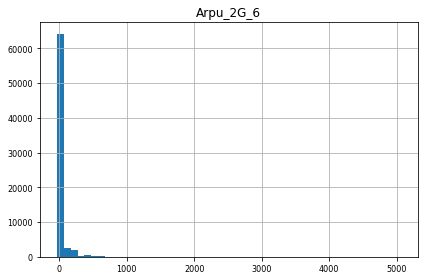

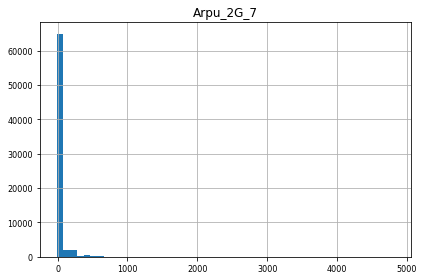

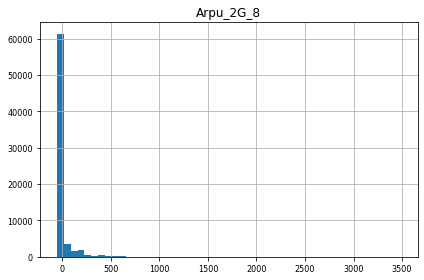

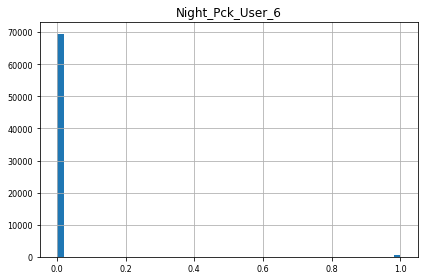

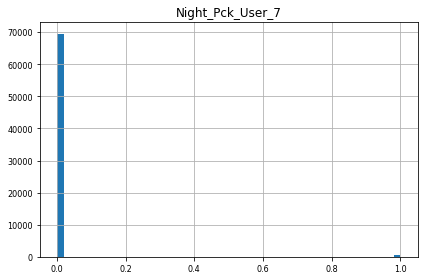

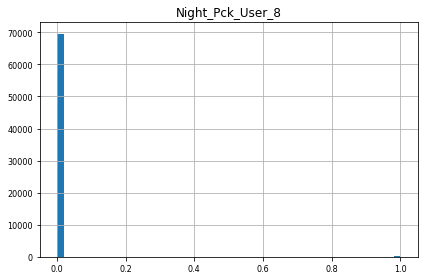

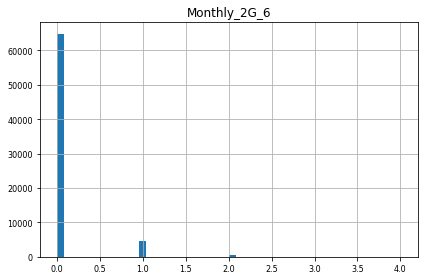

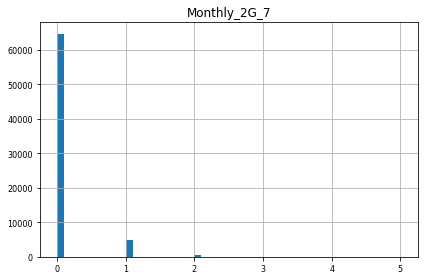

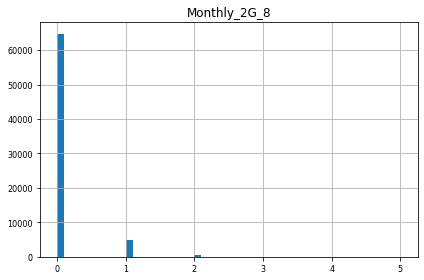

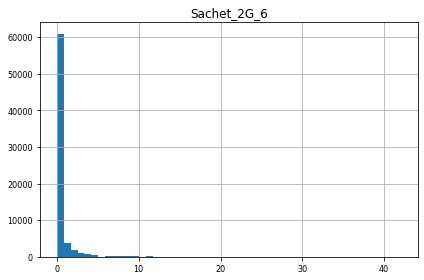

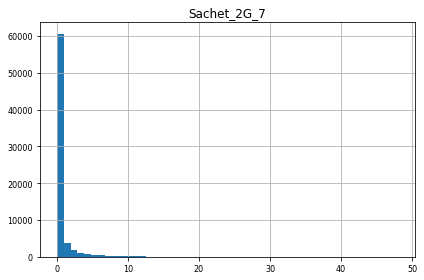

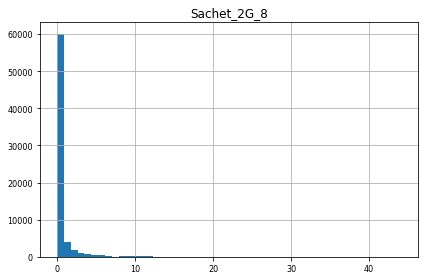

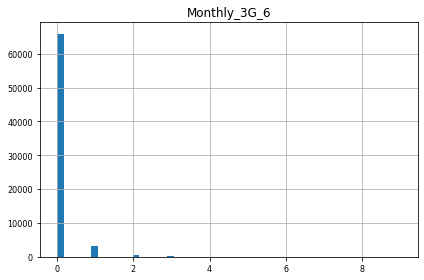

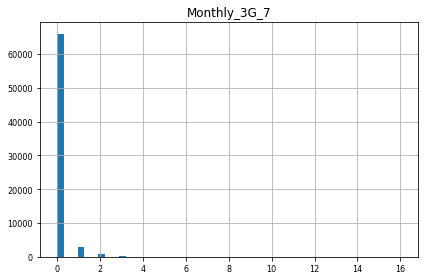

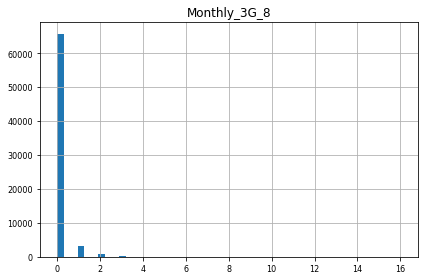

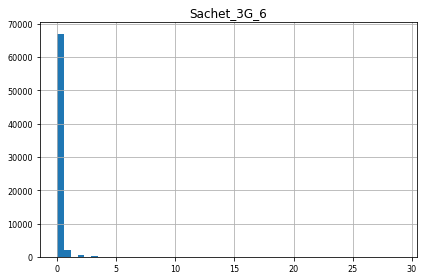

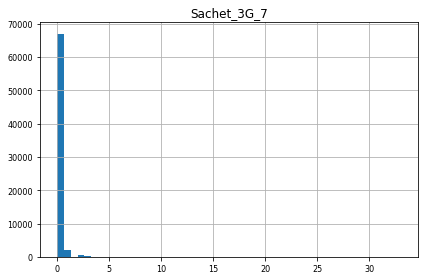

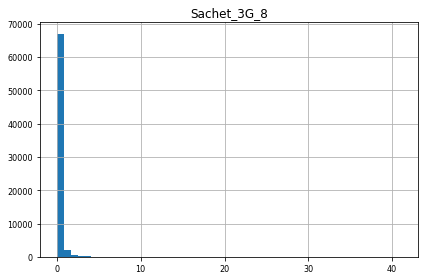

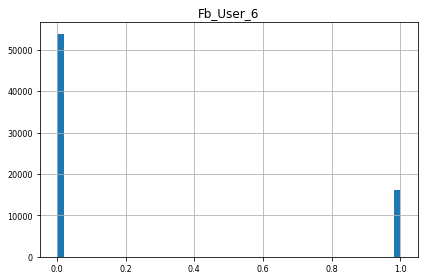

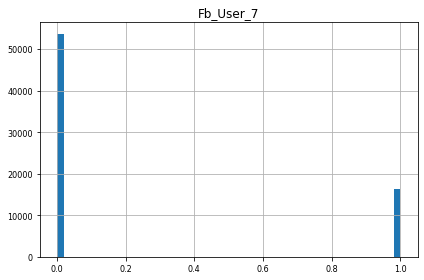

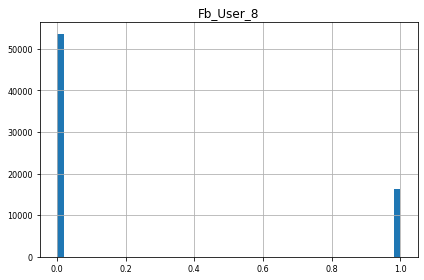

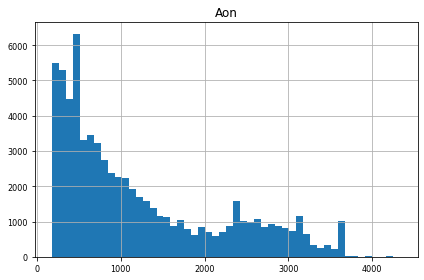

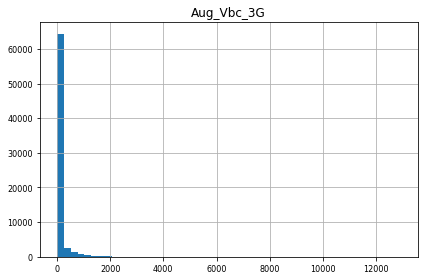

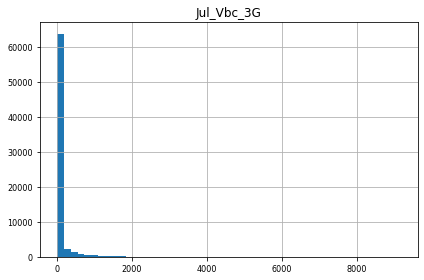

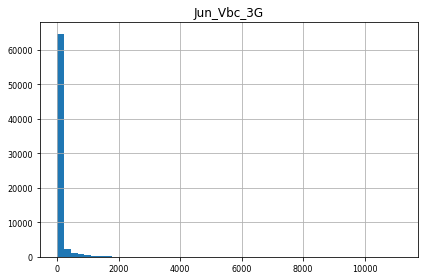

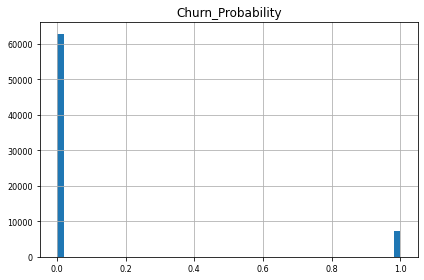

In [23]:
#Checking hist diagran of all number columns
def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data_train[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data_train.select_dtypes(include=['number']):
    plotHistChart(i)



In [24]:
data_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999

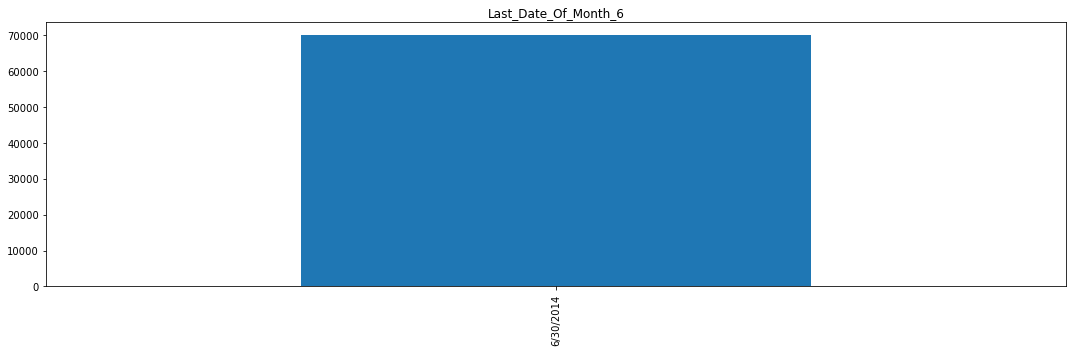

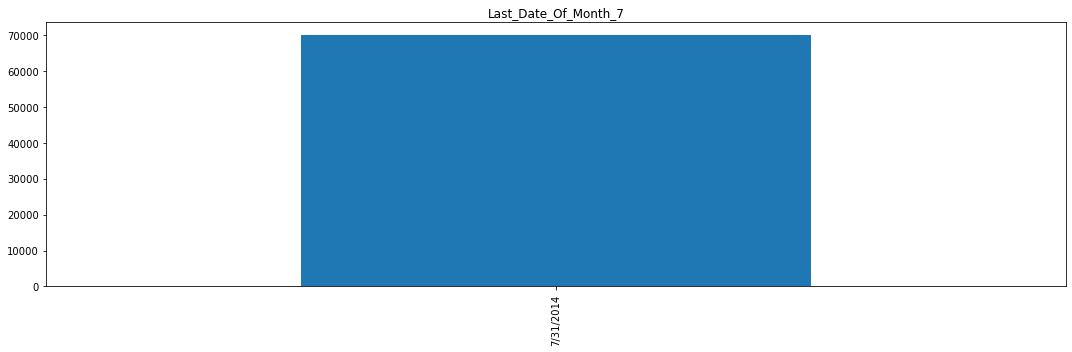

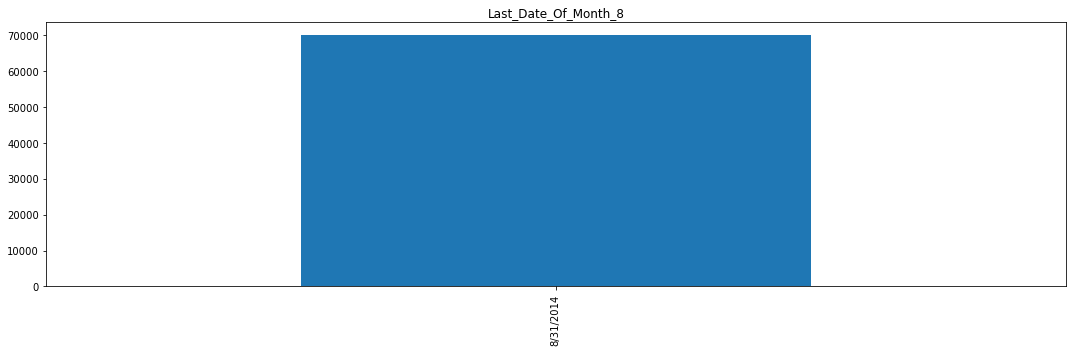

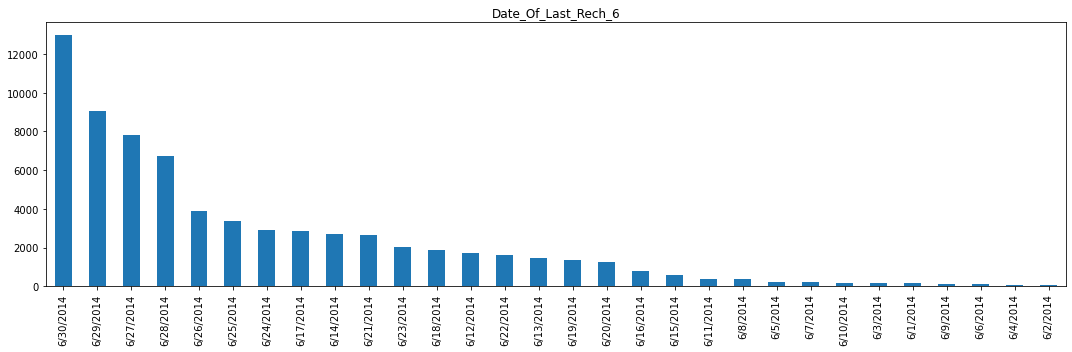

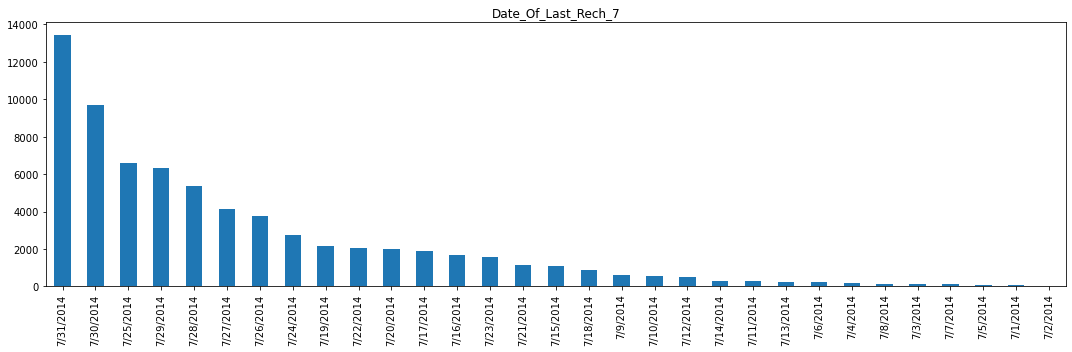

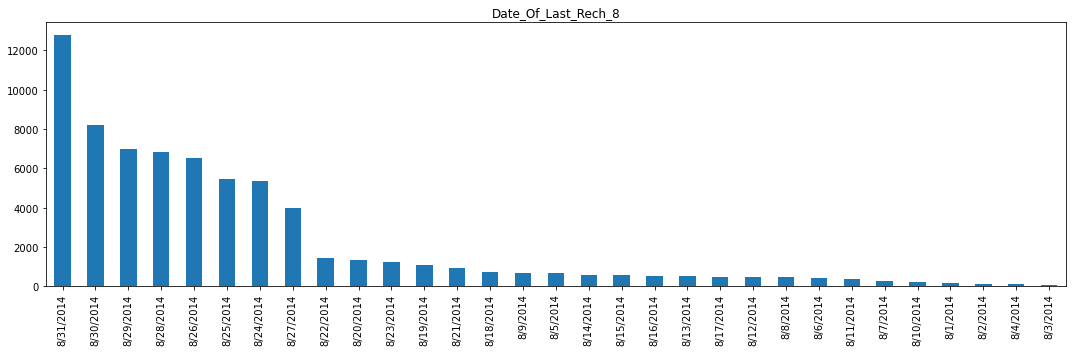

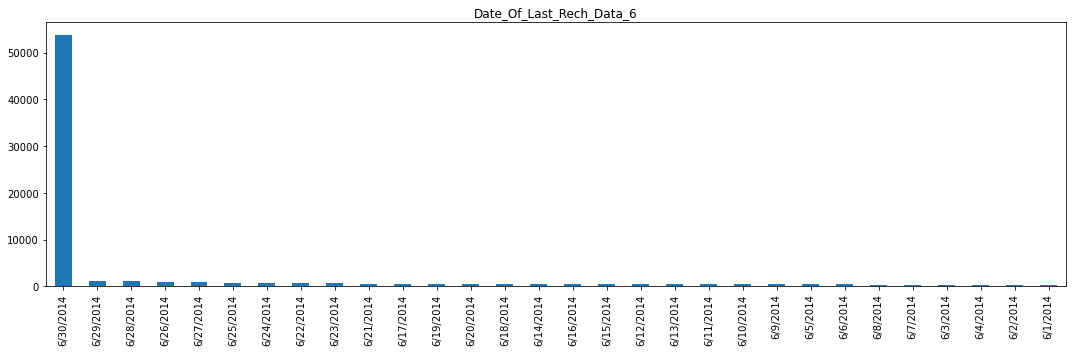

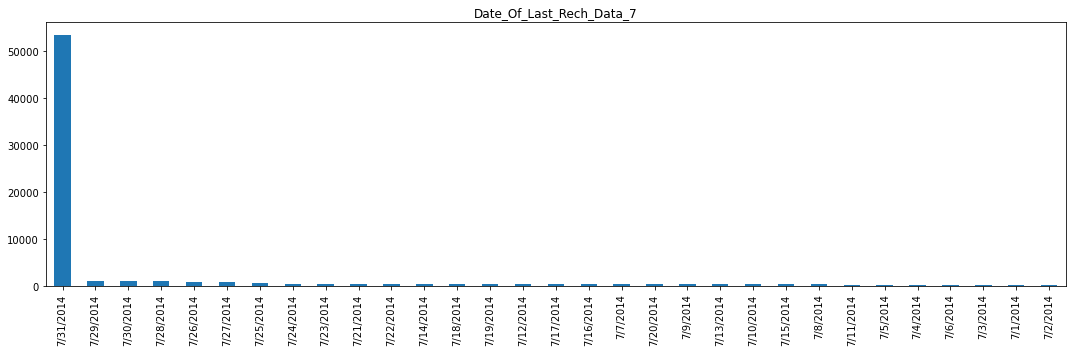

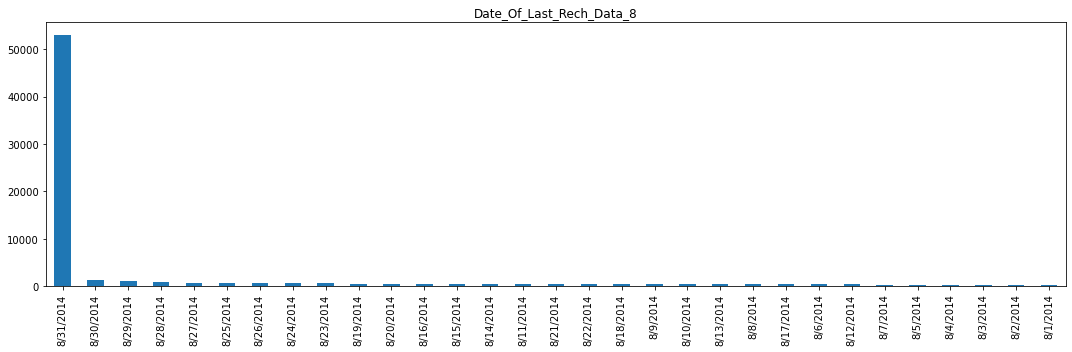

In [25]:
#Checking all Object columns bar graphs
def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data_train[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data_train.select_dtypes(include=['object']):
    plotBarChart(i)

In [26]:
data_train.filter(regex='ic').filter(regex='_6').head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,0.00,2.43,0.83,0.00,3.26,0.00,7.46,0.0,7.46,11.84,0.0,0.0,1.11
1,0.00,1.68,1.41,0.35,3.44,0.00,0.00,0.0,0.00,3.44,0.0,0.0,0.00
2,0.00,4.51,89.86,0.00,94.38,11.69,18.21,0.0,29.91,124.29,0.0,0.0,0.00
3,0.00,24.98,53.99,7.23,86.21,0.00,8.89,0.0,8.89,95.11,0.0,0.0,0.00
4,53.64,5.44,10.58,5.51,21.54,0.00,0.00,0.0,0.00,21.54,0.0,0.0,0.00


In [27]:
data_train.filter(regex='rech').filter(regex='_6').head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,3,77,65,6/22/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
1,3,0,0,6/12/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
2,2,70,70,6/11/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
3,2,160,110,6/15/2014,6/30/2014,0.0,0.0,0.0,0.0,0.0
4,13,290,50,6/25/2014,6/25/2014,7.0,25.0,7.0,0.0,175.0


In [28]:
#Calculate total recharge 
data_train['total_data_rech_amt_6'] = data_train['total_rech_data_6'] * data_train['av_rech_amt_data_6']
data_train['total_data_rech_amt_7'] = data_train['total_rech_data_7'] * data_train['av_rech_amt_data_7']
data_train['total_data_rech_amt_8'] = data_train['total_rech_data_8'] * data_train['av_rech_amt_data_8']
data_train['total_rech_6'] = data_train[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_train['total_rech_7'] = data_train[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_train['total_rech_8'] = data_train[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

drop_data_rech_columns = ['total_rech_data_6','av_rech_amt_data_6',
                         'total_rech_data_7','av_rech_amt_data_7',
                         'total_rech_data_8','av_rech_amt_data_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                         'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data_train.drop(drop_data_rech_columns,axis=1,inplace=True)

In [29]:
data_test['total_data_rech_amt_6'] = data_test['total_rech_data_6'] * data_test['av_rech_amt_data_6']
data_test['total_data_rech_amt_7'] = data_test['total_rech_data_7'] * data_test['av_rech_amt_data_7']
data_test['total_data_rech_amt_8'] = data_test['total_rech_data_8'] * data_test['av_rech_amt_data_8']
data_test['total_rech_6'] = data_test[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_test['total_rech_7'] = data_test[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_test['total_rech_8'] = data_test[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

data_test.drop(drop_data_rech_columns,axis=1,inplace=True)

In [30]:
#Calculate Roaming
data_train['roam_6'] = data_train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_7'] = data_train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_8'] = data_train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

drop_roam_columns =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
data_train.drop(drop_roam_columns,axis=1,inplace=True)

In [31]:
data_test['roam_6'] = data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_7'] = data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_8'] = data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

data_test.drop(drop_roam_columns,axis=1,inplace=True)

In [32]:
#Calculate Local
data_train['local_6'] = data_train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_7'] = data_train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_8'] = data_train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_loc_columns = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                    'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
data_train.drop(drop_loc_columns,axis=1,inplace=True)

In [33]:
data_test['local_6'] = data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_7'] = data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_8'] = data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_loc_columns,axis=1,inplace=True)

In [34]:
#Calculate STD
data_train['std_6'] = data_train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_7'] = data_train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_8'] = data_train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_std_columns = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                    'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                    'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                    'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                    'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
data_train.drop(drop_std_columns,axis=1,inplace=True)

In [35]:
data_test['std_6'] = data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_7'] = data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_8'] = data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_std_columns,axis=1,inplace=True)

In [36]:
#Calculate SPL
data_train['spl_6'] = data_train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_7'] = data_train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_8'] = data_train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_spl_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                    'og_others_6', 'og_others_7', 'og_others_8',  
                    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                    'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                    'ic_others_6', 'ic_others_7', 'ic_others_8']
data_train.drop(drop_spl_columns,axis=1,inplace=True)

In [37]:
data_test['spl_6'] = data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_7'] = data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_8'] = data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_spl_columns,axis=1,inplace=True)

In [38]:
#Calculate Data usage
data_train['data_used_6'] = data_train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_train['data_used_7'] = data_train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_train['data_used_8'] = data_train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
drop_data_usage_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
                           'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                           'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
data_train.drop(drop_data_usage_columns,axis=1,inplace=True)

In [39]:
data_test['data_used_6'] = data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_test['data_used_7'] = data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_test['data_used_8'] = data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

data_test.drop(drop_data_usage_columns,axis=1,inplace=True)

In [40]:
drop_others_columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                    'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                    'offnet_mou_6','offnet_mou_7','offnet_mou_8',
                    'fb_user_6','fb_user_7','fb_user_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
data_train.drop(drop_others_columns,axis=1,inplace=True)

data_test.drop(drop_others_columns,axis=1,inplace=True)

In [41]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 69999 non-null  float64
 1   arpu_7                 69999 non-null  float64
 2   arpu_8                 69999 non-null  float64
 3   total_og_mou_6         69999 non-null  float64
 4   total_og_mou_7         69999 non-null  float64
 5   total_og_mou_8         69999 non-null  float64
 6   total_ic_mou_6         69999 non-null  float64
 7   total_ic_mou_7         69999 non-null  float64
 8   total_ic_mou_8         69999 non-null  float64
 9   total_rech_amt_6       69999 non-null  int64  
 10  total_rech_amt_7       69999 non-null  int64  
 11  total_rech_amt_8       69999 non-null  int64  
 12  last_day_rch_amt_6     69999 non-null  int64  
 13  last_day_rch_amt_7     69999 non-null  int64  
 14  last_day_rch_amt_8     69999 non-null  int64  
 15  ar

In [42]:
data_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,77,65,10,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0,0.0,0.0,0.0,77.0,65.0,10.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,0,145,50,0,0,0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0,0.0,145.0,0.0,0.0,290.0,50.0,0,0,0,1,1,1,0,0,0,0,1,1,0.0,356.87,0.00
2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,70,120,0,70,50,0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0,0.0,0.0,0.0,70.0,120.0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,160,240,130,110,110,50,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0,0.0,0.0,0.0,160.0,240.0,130.0,0,0,1,1,1,1,1,1,1,1,1,1,0.0,0.00,0.00
4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,290,136,122,25,10,30,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.8,308.89,213.47


In [43]:
X_train = data_train.drop(['churn_probability'], axis=1)
y_train = data_train['churn_probability']

X_test = data_test

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(69999, 58)
(69999,)
(30000, 58)


In [45]:
#Scaling 
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [46]:
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,roam_6,roam_7,roam_8,local_6,local_7,local_8,std_6,std_7,std_8,spl_6,spl_7,spl_8,data_used_6,data_used_7,data_used_8
0,-0.753587,-0.555159,-0.771000,-0.483870,-0.185530,-0.629550,-0.647578,-0.501528,-0.547718,-0.621313,-0.626118,-0.736420,0.016059,0.059791,-0.612666,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,0.774197,-0.198235,-0.201406,-0.183406,-0.436829,-0.419611,-0.437345,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
1,-0.847171,-0.451263,-0.670336,-0.658328,-0.584066,-0.570902,-0.676532,-0.547355,-0.601544,-0.811809,-0.431502,-0.642563,-0.647517,-0.621345,-0.612666,-0.216209,0.934540,-0.226499,-0.232603,1.028118,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,2.406846,-0.214653,-0.13149,-0.128351,-0.12571,-0.536150,-0.198235,-0.032133,-0.183406,-0.520998,-0.199996,-0.401504,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,-1.883940,-1.867151,-1.811865,-1.381137,0.749032,0.742237,-0.294881,0.138367,-0.312207
2,-0.665232,-0.508211,-0.792389,-0.536975,-0.440827,-0.637145,-0.259970,-0.566258,-0.561313,-0.638631,-0.492319,-0.759885,0.067103,-0.097394,-0.612666,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,-0.355557,-0.198235,-0.201406,-0.183406,-0.444481,-0.365927,-0.446306,-0.518403,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
3,-0.379318,-0.211770,-0.476708,-0.494998,-0.447881,-0.524494,-0.360552,-0.511165,-0.397614,-0.415973,-0.200396,-0.454848,0.475458,0.531347,-0.122451,-0.216209,-0.213993,-0.226499,-0.232603,-0.224871,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,-0.260249,-0.267357,-0.275350,-0.211242,-0.202851,-0.214653,-0.13149,-0.128351,-0.12571,-0.250562,-0.198235,-0.201406,-0.183406,-0.346100,-0.248800,-0.329822,-0.518403,-0.439914,2.317183,0.29417,0.284133,0.311572,0.530802,0.535575,0.551917,0.724041,0.749032,0.742237,-0.294881,-0.307454,-0.312207
4,-0.126945,-0.435570,-0.503788,-0.522431,-0.558582,-0.604170,-0.614143,-0.648713,-0.590203,-0.094357,-0.453396,-0.473619,-0.392295,-0.516555,-0.318537,-0.216209,0.115315,-0.226499,-0.232603,0.135589,-0.238477,-0.079896,-0.078619,-0.074561,-0.269028,-0.273626,-0.27044,4.424547,3.366803,3.400133,-0.211242,-0.202851,-0.214653,-0.13149,1.447588,-0.12571,-0.602297,1.437263,1.359412,0.713383,1.135068,0.954686,0.426427,1.929002,-0.439914,-0.431559,0.29417,0.284133,0.311572,0.530802,-1.867151,-1.811865,-1.381137,0.749032,-1.347279,0.197548,0.078427,-0.049531


In [47]:
#PCA

pca = PCA(random_state=42)

In [48]:
pca.fit(X_train)

PCA(random_state=42)

In [49]:
pca.components_

array([[ 1.70240634e-01,  1.83247474e-01,  1.74737968e-01, ...,
         1.93695160e-01,  2.08199641e-01,  2.04282572e-01],
       [ 2.19818636e-01,  2.42468169e-01,  2.29150034e-01, ...,
        -1.25280693e-01, -1.26225768e-01, -1.19506677e-01],
       [-3.27780506e-02, -2.11227425e-02, -2.18670782e-02, ...,
        -6.31902695e-02, -5.95349654e-02, -5.36215565e-02],
       ...,
       [-6.53241488e-16,  1.31851580e-16,  8.03528960e-16, ...,
         2.30511348e-17,  1.78266452e-16,  1.87821111e-17],
       [-0.00000000e+00, -1.38421997e-17, -5.94763163e-16, ...,
         1.59720185e-16,  1.43538739e-17, -7.61882344e-17],
       [ 0.00000000e+00, -4.97427829e-16,  3.28340497e-16, ...,
         6.52594482e-17,  2.13204821e-16,  1.13350653e-16]])

In [50]:
pca.explained_variance_ratio_

array([2.07507043e-01, 1.06459518e-01, 7.05830302e-02, 5.52442083e-02,
       4.05846024e-02, 3.97785097e-02, 3.51785154e-02, 3.40860794e-02,
       2.77203054e-02, 2.74060187e-02, 2.60884950e-02, 2.48139533e-02,
       2.27546650e-02, 1.95715099e-02, 1.53470256e-02, 1.45748364e-02,
       1.39644264e-02, 1.37522093e-02, 1.26386636e-02, 1.22763135e-02,
       1.16951452e-02, 1.16004764e-02, 1.11756632e-02, 9.69710982e-03,
       9.35920884e-03, 9.20579315e-03, 9.03483160e-03, 8.97695849e-03,
       8.72673114e-03, 8.69279389e-03, 7.70545453e-03, 7.58484641e-03,
       7.47311623e-03, 6.70643550e-03, 5.78532257e-03, 4.84031935e-03,
       4.66470099e-03, 4.31740643e-03, 4.31711976e-03, 3.80778568e-03,
       3.49960161e-03, 2.72694275e-03, 2.49031576e-03, 2.36521639e-03,
       2.16810448e-03, 2.12377561e-03, 1.45622442e-03, 1.43885801e-03,
       1.39265326e-03, 1.20264978e-03, 8.93294355e-04, 8.29738443e-04,
       6.93781494e-04, 5.79137734e-04, 4.42558722e-04, 4.09235484e-32,
      

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

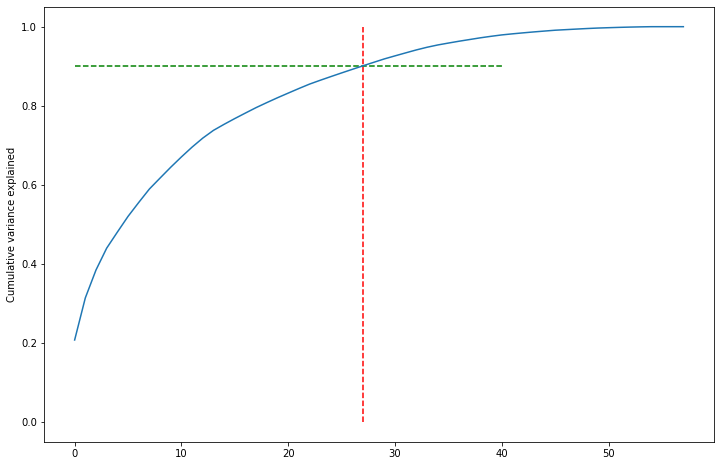

In [94]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [56]:
from sklearn.decomposition import IncrementalPCA

In [95]:
pca_final = IncrementalPCA(n_components=27)

In [96]:
df_train_pca = pca_final.fit_transform(X_train)

In [97]:
df_train_pca.shape

(69999, 27)

In [98]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [99]:
corrmat.shape

(27, 27)

<AxesSubplot:>

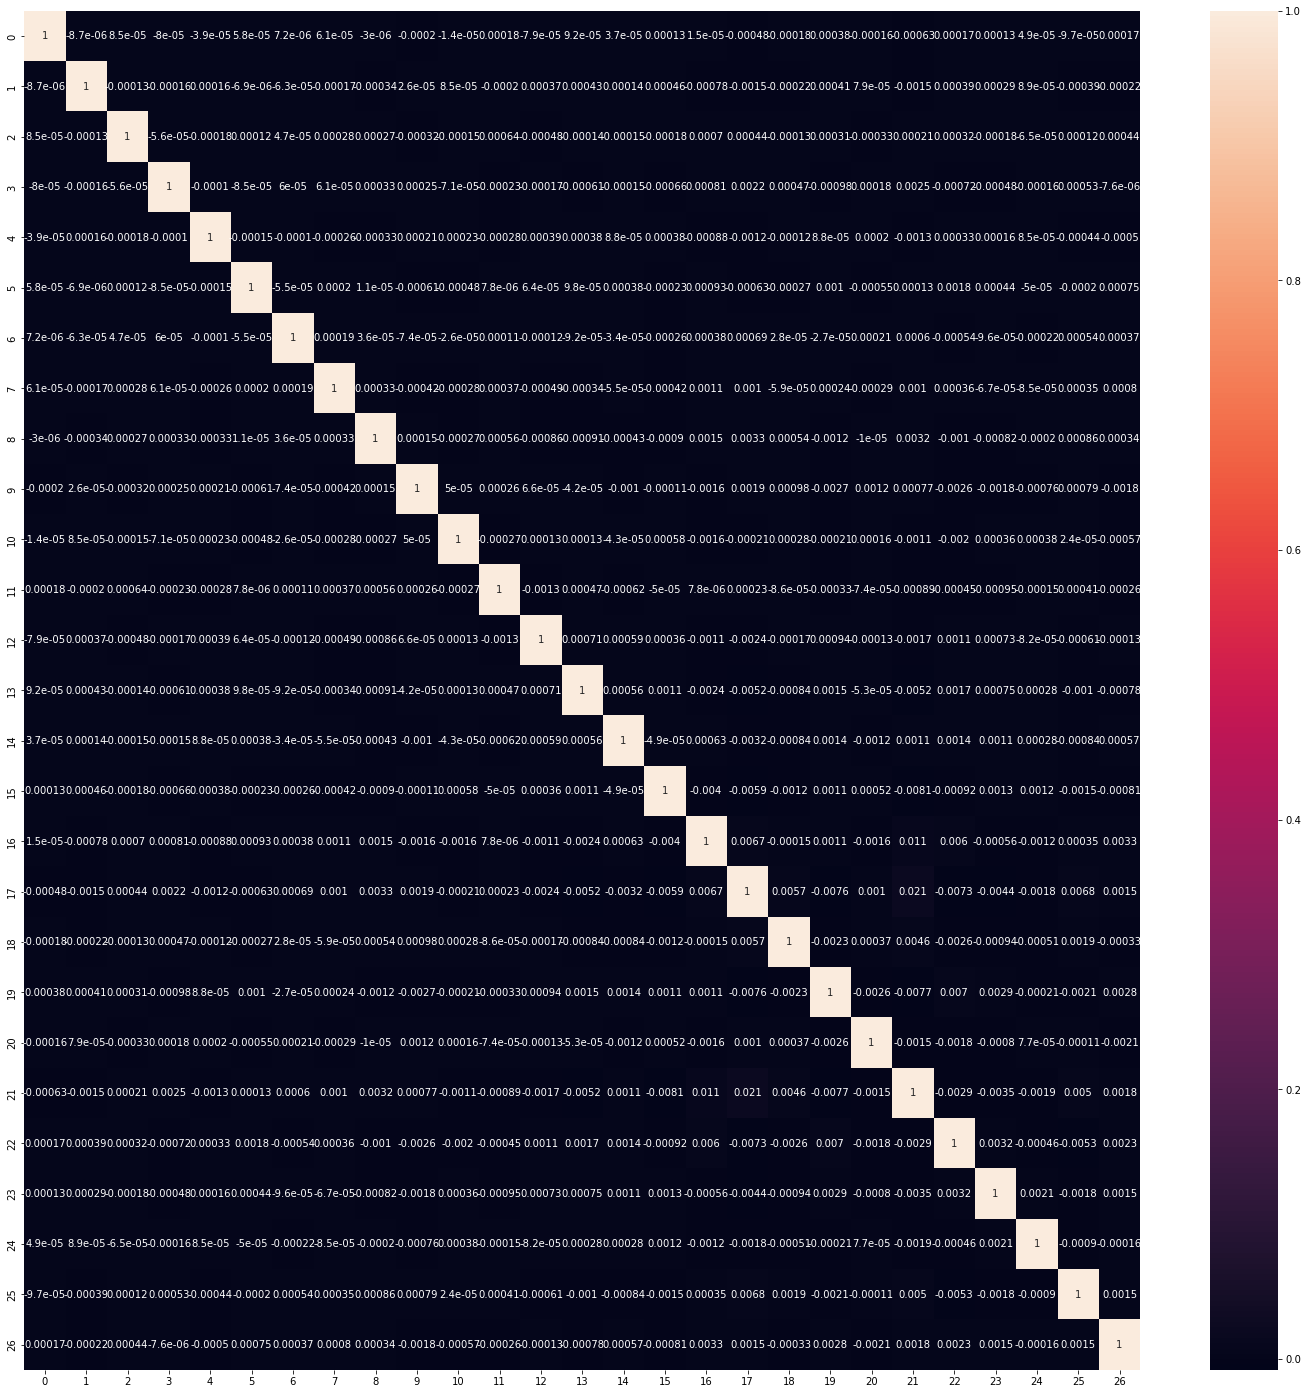

In [100]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [101]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 27)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
learner_pca = LogisticRegression()

In [104]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [105]:
round(model_pca.score(df_train_pca, y_train) * 100, 2)

93.64

In [106]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [107]:
pred_probs_test

array([[1.00000000e+000, 4.06198931e-251],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.67489606e-219],
       ...,
       [1.00000000e+000, 6.80859129e-128],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [108]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

NameError: name 'y_test' is not defined

In [109]:
pca_again = PCA(0.9)

In [110]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [111]:
df_train_pca2.shape

(69999, 28)

In [112]:
learner_pca2 = LogisticRegression()

In [113]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [114]:
round(model_pca2.score(df_train_pca2, y_train) * 100, 2)

93.65

In [115]:
df_test_pca2 = pca_again.transform(X_test)

In [116]:
df_test_pca2.shape

(30000, 28)

In [117]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [118]:
pred_probs_test2

array([3.52048294e-258, 0.00000000e+000, 3.25485264e-173, ...,
       1.07123699e-127, 1.00000000e+000, 0.00000000e+000])

In [119]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

NameError: name 'y_test' is not defined

In [ ]:
#Logistic Regression
#Decision Tree
#Random Forest
#Xgboost

In [ ]:
#To do
#Logistic Regresion -- Priyesh
#Univariate and Bivariate -- Priyesh
#Xgboost -- Priyesh
#submit score kaggle -- Priyesh
#Comments -- Chandra
#Decision Tree -- Chandra
#Random Forest -- Chandra
#SMOTE Analysis -- Chandra